# Phishing Feature Extraction Demo

This notebook demonstrates extraction of URL features using URLFeatureExtractor and visualizes feature distributions.

In [1]:
import sys
sys.path.append('/mnt/data')
from URL_feature_extractor import URLFeatureExtractor
import pandas as pd

In [6]:
# Load URLs from a CSV file (first column contains URLs)
url_data = pd.read_csv('../../raw/raw/combined_dataset.csv')  # Replace 'urls.csv' with your file path
urls = url_data.iloc[:, 0].tolist()  # Extract first column as list

# Show how many URLs were loaded
print(f"Loaded {len(urls)} URLs from CSV file")
print(f"First 5 URLs: {urls[:5]}")

Loaded 1001 URLs from CSV file
First 5 URLs: ['https://auth-m-start-ledgerre.webflow.io/,1,PhishTank,2025-05-10T12:28:07.544276+00:00', 'https://bit.ly/3XVDSvj,1,PhishTank,2025-05-10T12:28:07.544276+00:00', 'https://setuplbpro75002.firebaseapp.com/,1,PhishTank,2025-05-10T12:28:07.544276+00:00', 'https://l.ead.me/bfI7Co,1,PhishTank,2025-05-10T12:28:07.544276+00:00', 'https://bit.ly/1Q6rz,1,PhishTank,2025-05-10T12:28:07.544276+00:00']


In [7]:
extractor = URLFeatureExtractor()
col_names = ['url_length', 'path_depth', 'domain_length', 'num_subdomains', 'num_special_chars', 'num_digits', 'num_hyphens', 'num_underscores', 'has_at_symbol', 'query_length', 'num_query_params', 'contains_ip', 'digit_ratio', 'url_entropy', 'suspicious_word_count']
features = extractor.transform(urls)
df = pd.DataFrame(features, columns=col_names)
df

,url_length,path_depth,domain_length,num_subdomains,num_special_chars,num_digits,num_hyphens,num_underscores,has_at_symbol,query_length,num_query_params,contains_ip,digit_ratio,url_entropy,suspicious_word_count
0,86.0,1.0,32.0,0.0,19.0,25.0,5.0,0.0,0.0,0.0,0.0,0.0,0.290698,4.858032,0.0
1,67.0,1.0,6.0,0.0,15.0,26.0,2.0,0.0,0.0,0.0,0.0,0.0,0.388060,4.780433,0.0
2,85.0,1.0,31.0,0.0,16.0,30.0,2.0,0.0,0.0,0.0,0.0,0.0,0.352941,4.749006,0.0
3,68.0,1.0,8.0,0.0,16.0,26.0,2.0,0.0,0.0,0.0,0.0,0.0,0.382353,4.750789,0.0
4,65.0,1.0,6.0,0.0,15.0,27.0,2.0,0.0,0.0,0.0,0.0,0.0,0.415385,4.616459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,71.0,0.0,63.0,0.0,14.0,25.0,2.0,0.0,0.0,0.0,0.0,0.0,0.352113,4.562014,0.0
997,60.0,0.0,52.0,0.0,14.0,25.0,2.0,0.0,0.0,0.0,0.0,0.0,0.416667,4.502910,0.0
998,74.0,0.0,66.0,0.0,15.0,25.0,3.0,0.0,0.0,0.0,0.0,0.0,0.337838,4.552651,0.0
999,65.0,0.0,57.0,0.0,16.0,25.0,2.0,0.0,0.0,0.0,0.0,0.0,0.384615,4.584153,0.0


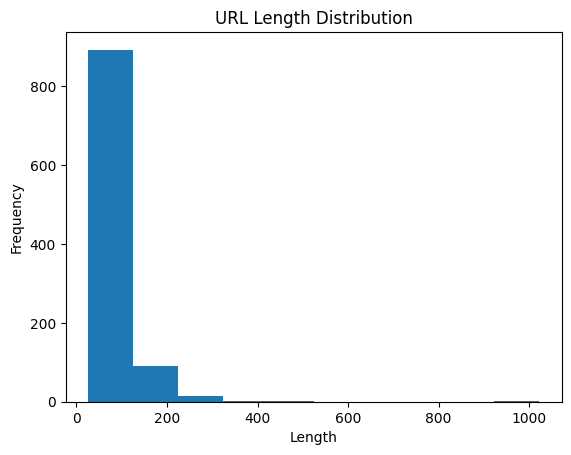

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(df['url_length'])
plt.title('URL Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

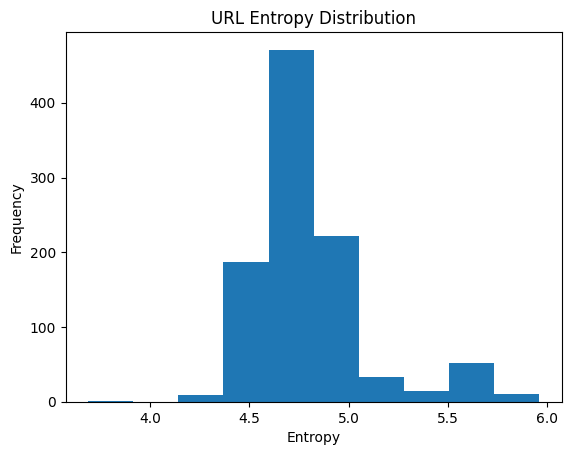

In [9]:
plt.figure()
plt.hist(df['url_entropy'])
plt.title('URL Entropy Distribution')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.show()

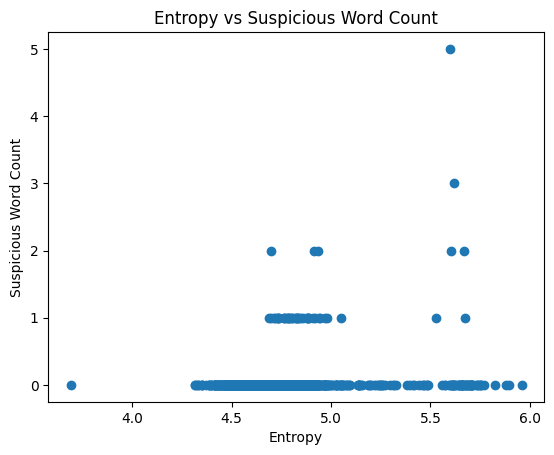

In [10]:
plt.figure()
plt.scatter(df['url_entropy'], df['suspicious_word_count'])
plt.title('Entropy vs Suspicious Word Count')
plt.xlabel('Entropy')
plt.ylabel('Suspicious Word Count')
plt.show()